### IMPORTING THE PACKAGES

In [44]:

import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as scipy
import mpl_toolkits
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn import preprocessing
from keras.models import Sequential
from __future__ import division
%matplotlib inline

### LOADING THE DATA 

In [5]:
data = pd.read_csv("Football.csv")
data = data.fillna({"HTHG":data.HTHG.mode()[0],"HTAG": data.HTAG.mode()[0],"HS": data.HS.mode()[0],"AS": data.AS.mode()[0],"HST": data.HST.mode()[0],"AST": data.AST.mode()[0],"HF": data.HST.mode()[0],"AF": data.AST.mode()[0],"HC": data.HC.mode()[0],"AC": data.AC.mode()[0],"HY": data.HY.mode()[0],"AY": data.AY.mode()[0],"HR": data.HR.mode()[0],"AR": data.AR.mode()[0]})
data = data.drop(['Div', 'HTR'], axis = 1)
data.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,Fiorentina,Torino,1,0,H,0.0,0.0,17.0,6.0,8.0,3.0,17.0,20.0,4.0,1.0,3.0,1.0,0.0,0.0
1,Verona,Roma,0,0,D,0.0,0.0,9.0,15.0,7.0,7.0,19.0,20.0,0.0,6.0,2.0,0.0,0.0,0.0
2,Parma,Napoli,0,2,A,0.0,0.0,4.0,12.0,2.0,7.0,16.0,12.0,4.0,2.0,4.0,1.0,0.0,0.0
3,Genoa,Crotone,4,1,H,3.0,1.0,10.0,11.0,8.0,5.0,13.0,14.0,6.0,4.0,4.0,2.0,0.0,0.0
4,Sassuolo,Cagliari,1,1,D,0.0,0.0,21.0,8.0,10.0,4.0,9.0,18.0,7.0,3.0,1.0,3.0,0.0,0.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3787 entries, 0 to 3786
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   HomeTeam  3787 non-null   object 
 1   AwayTeam  3787 non-null   object 
 2   FTHG      3787 non-null   int64  
 3   FTAG      3787 non-null   int64  
 4   FTR       3787 non-null   object 
 5   HTHG      3787 non-null   float64
 6   HTAG      3787 non-null   float64
 7   HS        3787 non-null   float64
 8   AS        3787 non-null   float64
 9   HST       3787 non-null   float64
 10  AST       3787 non-null   float64
 11  HF        3787 non-null   float64
 12  AF        3787 non-null   float64
 13  HC        3787 non-null   float64
 14  AC        3787 non-null   float64
 15  HY        3787 non-null   float64
 16  AY        3787 non-null   float64
 17  HR        3787 non-null   float64
 18  AR        3787 non-null   float64
dtypes: float64(14), int64(2), object(3)
memory usage: 562.3+ KB


In [13]:
data_wo = data.drop(columns = ['HomeTeam','AwayTeam'])
print(len(data_wo.columns))
list(data_wo)

17


['FTHG',
 'FTAG',
 'FTR',
 'HTHG',
 'HTAG',
 'HS',
 'AS',
 'HST',
 'AST',
 'HF',
 'AF',
 'HC',
 'AC',
 'HY',
 'AY',
 'HR',
 'AR']

### CLEANING REQUIRED DATA

In [14]:
res_16 = data.iloc[:,:23]
# res_14 = df_14.ix[:,:23]
# res_14 = res_14.drop(['Div','Date'],axis=1)
table_features = data.iloc[:,:7]
table_features = table_features.drop(['FTHG','FTAG'],axis=1)
bet_16 = data.iloc[:,:23]

In [15]:
res_16.head()
feature_table = data.iloc[:,:23]

In [16]:
res_16.tail()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
3782,Juventus,Atalanta,3,1,H,2.0,0.0,12.0,10.0,6.0,2.0,11.0,7.0,4.0,5.0,0.0,0.0,0.0,0.0
3783,Lazio,Inter,3,1,H,0.0,1.0,12.0,11.0,6.0,4.0,12.0,16.0,4.0,10.0,3.0,0.0,0.0,0.0
3784,Milan,Novara,2,1,H,0.0,1.0,19.0,13.0,3.0,3.0,15.0,11.0,11.0,4.0,1.0,0.0,0.0,0.0
3785,Napoli,Siena,2,1,H,2.0,1.0,14.0,10.0,5.0,4.0,8.0,19.0,10.0,5.0,4.0,4.0,0.0,0.0
3786,Parma,Bologna,1,0,H,1.0,0.0,18.0,7.0,6.0,0.0,14.0,16.0,10.0,7.0,2.0,2.0,0.0,0.0


### CORRELATION

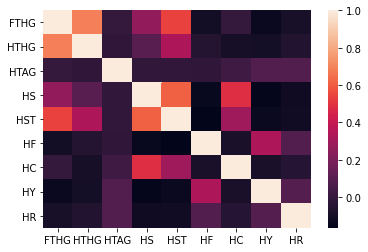

In [7]:
import seaborn as sns
home_features = [ f for f in list(data) if 'H' in f ]
corr = data[home_features].corr()
_ = sns.heatmap(corr)

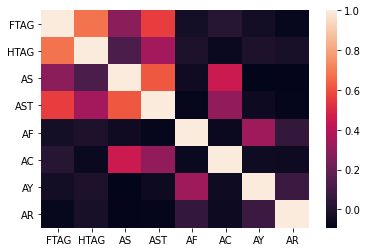

In [8]:
import seaborn as sns
away_features = [ f for f in list(data) if 'A' in f ]
corr = data[away_features].corr()
_ = sns.heatmap(corr)

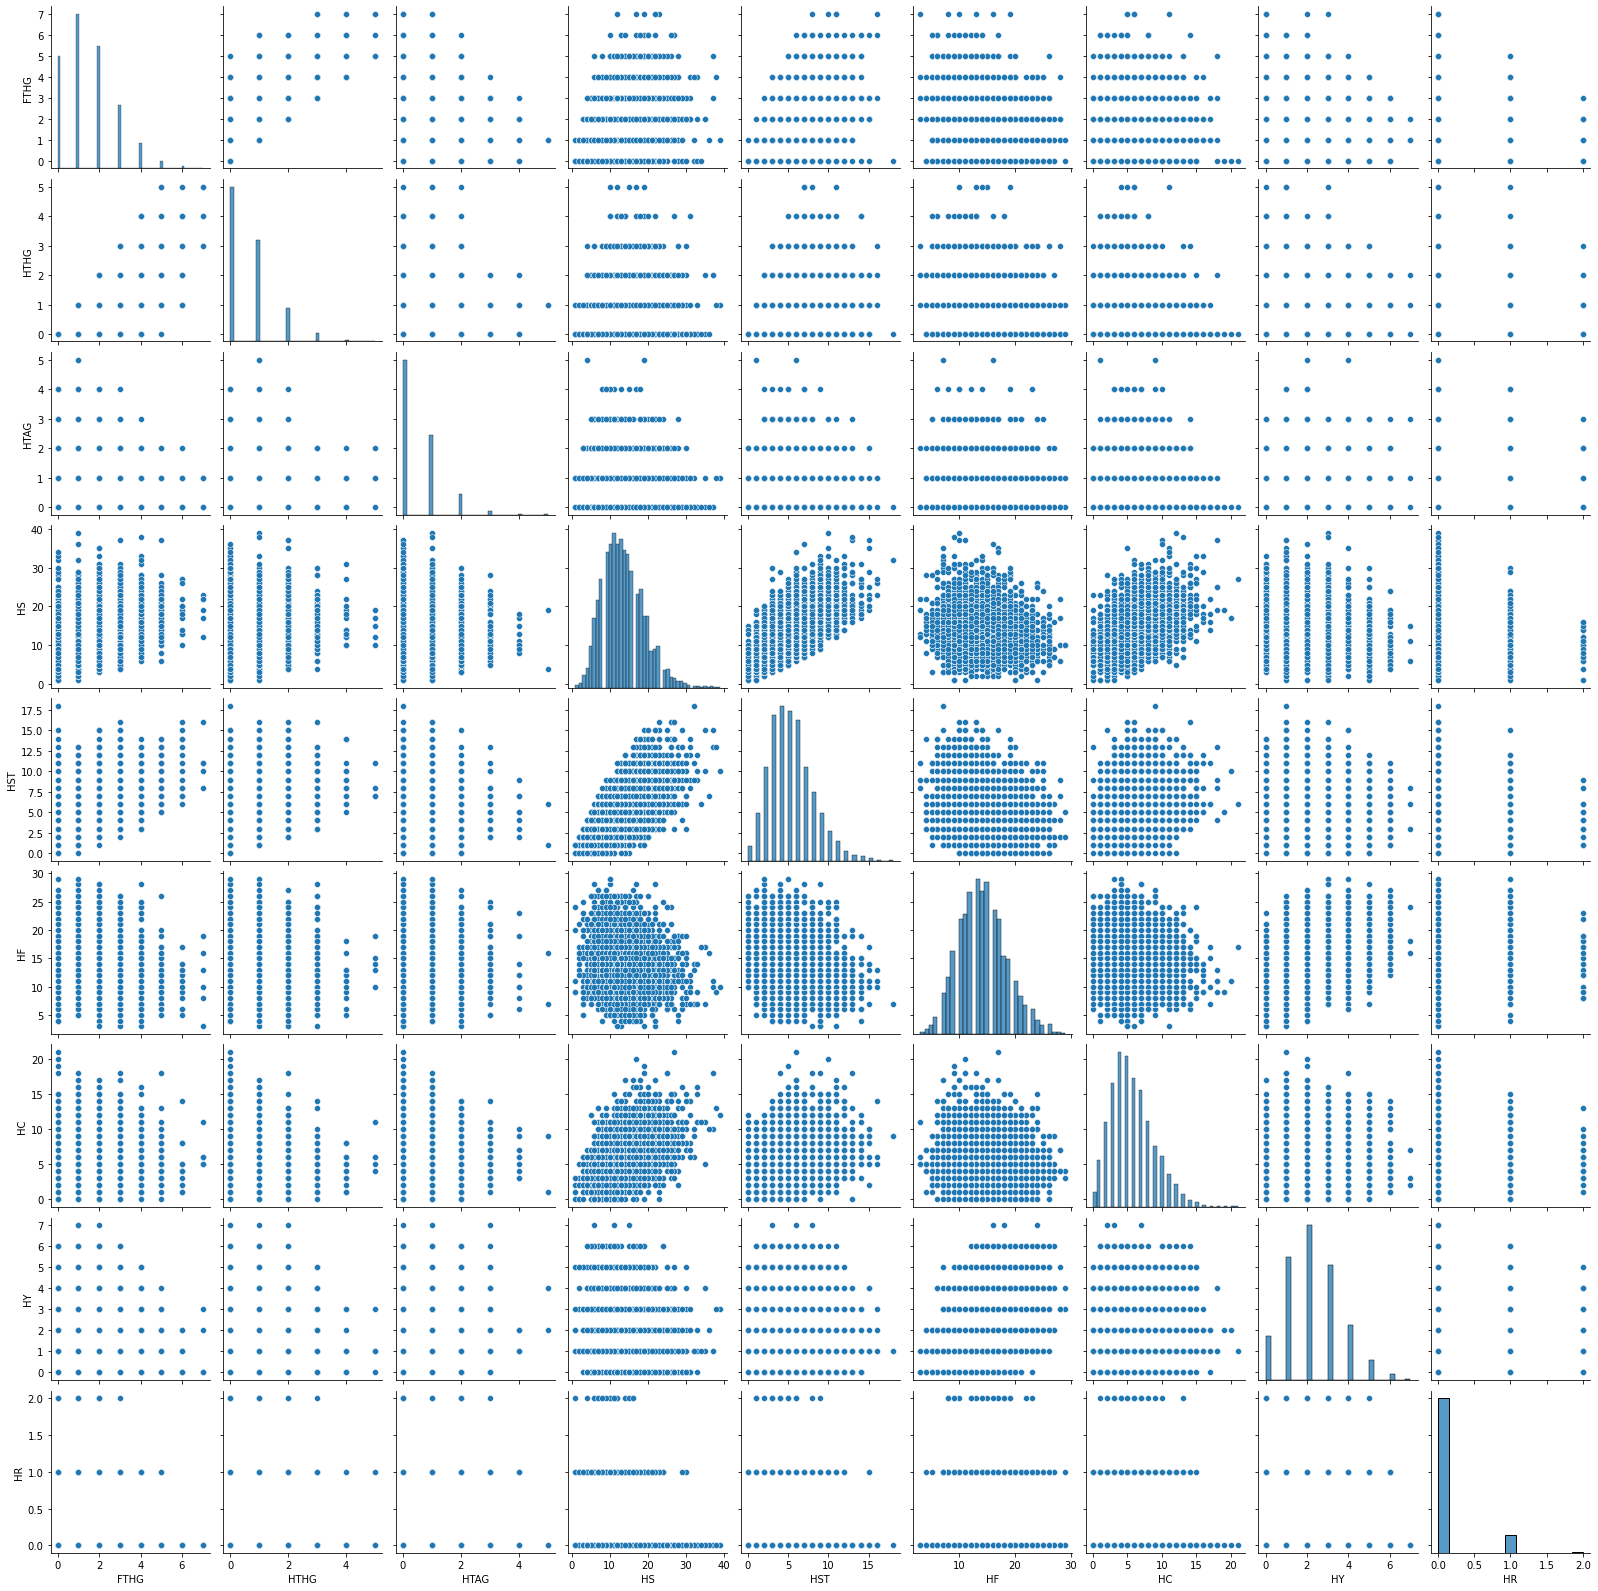

In [166]:
_ = sns.pairplot(data[home_features])

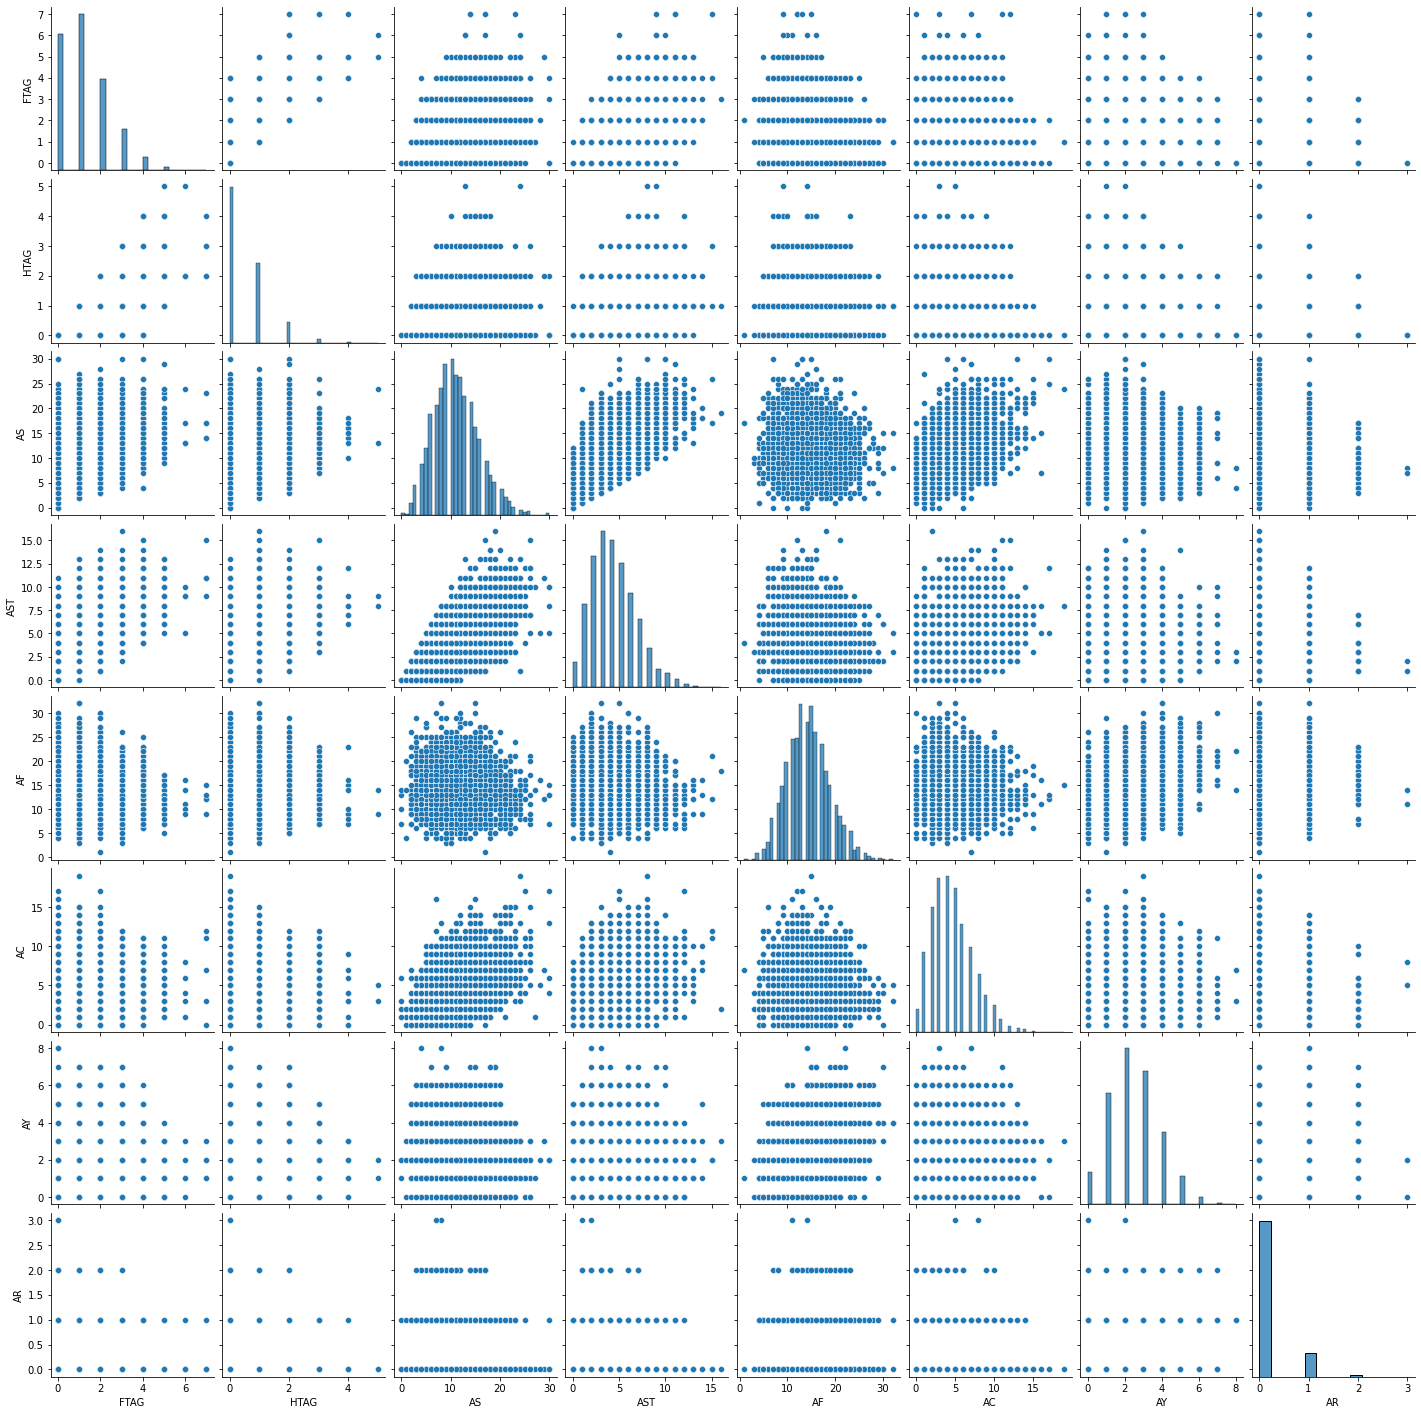

In [167]:
_ = sns.pairplot(data[away_features])

### checking avarage scores 

In [17]:
no_matches = data.shape[0]
no_features = data.shape[1]-1 
no_homewins = len(data[data.FTR == 'H'])                   
winning_rate_home = ((no_homewins)/(no_matches))*100

In [18]:
no_draws = len(data[data.FTR == 'D'])
no_awaywins = len(data[data.FTR == 'A'])
winning_rate_away = ((no_awaywins)/(no_matches))*100
drawing_rate = ((no_draws)/(no_matches))*100

In [19]:
avg_home_scored= data.FTHG.sum()*1.0 / data.shape[0]
avg_away_scored = data.FTAG.sum()*1.0 / data.shape[0]
avg_home_conceded = avg_away_scored
avg_away_conceded= avg_home_scored
print ("Average number of goals at home",avg_home_scored, '\n')
print ("Average number of goals away", avg_away_scored, '\n')
print ("Average number of goals conceded at home",avg_home_conceded, '\n')
print ("Average number of goals conceded away",avg_away_conceded, '\n')

Average number of goals at home 1.5349881172432005 

Average number of goals away 1.2244520728809083 

Average number of goals conceded at home 1.2244520728809083 

Average number of goals conceded away 1.5349881172432005 



In [20]:
print('number of matches:' , no_matches, '\n')
print('number of features:', no_features, '\n')
print('number of home winnings:', no_homewins, '\n')
print('number of away winnings:', no_awaywins, '\n')
print('number of draws:', no_draws, '\n' )
print('winning rate for home team:', winning_rate_home, '\n')
print('winning rate for away team:', winning_rate_away, '\n')
print('drawing rate for home & away teams:', drawing_rate, '\n')

number of matches: 3787 

number of features: 18 

number of home winnings: 1682 

number of away winnings: 1146 

number of draws: 959 

winning rate for home team: 44.41510430419857 

winning rate for away team: 30.261420649590704 

drawing rate for home & away teams: 25.32347504621072 



### Checking the chances of winning 

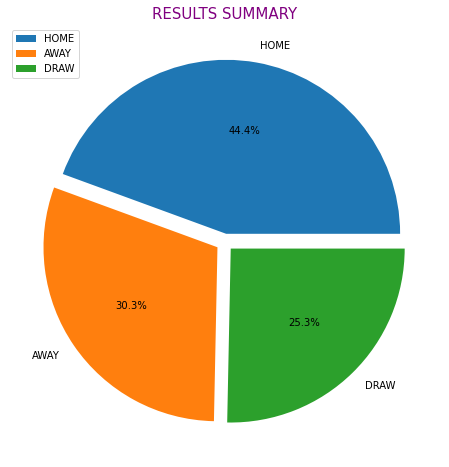

In [21]:
plt.figure(figsize = (8,8))
labels = [ 'HOME', 'AWAY' , 'DRAW']
values = [1682 , 1146 , 959]
explode = [0.05, 0.05, 0.05]
plt.pie( values , labels = labels , autopct = "%.1f%%", explode = explode)
plt.title('RESULTS SUMMARY' , color='purple', size= 15)
plt.legend(['HOME', 'AWAY', 'DRAW' ] , loc = 'upper left')
plt.show()

 ### Calculating attacking strength and defending strength

In [22]:
table_16 = pd.DataFrame(columns=('Team','HGS','AGS','HAS','AAS','HGC','AGC','HDS','ADS',))
table_16 = table_16[:-10]

In [23]:
res_16 = res_16[:-10]
res_16.shape[0]

3777

In [35]:
data_home = data.groupby('HomeTeam')
data_away = data.groupby('AwayTeam')

In [36]:
table_16.Team = data_home.HomeTeam.all().index
table_16.HGS = data_home.FTHG.sum().values
table_16.HGC = data_home.FTAG.sum().values
table_16.AGS = data_away.FTAG.sum().values
table_16.AGC = data_away.FTHG.sum().values
table_16

,Team,HGS,AGS,HAS,AAS,HGC,AGC,HDS,ADS
0,Atalanta,316,270,1.087218,1.164546,218,255,0.940263,0.877344
1,Benevento,42,30,0.144504,0.129394,79,79,0.340738,0.271805
2,Bologna,222,154,0.763805,0.664223,227,261,0.979081,0.897987
3,Brescia,21,14,0.072252,0.060384,34,45,0.146647,0.154825
4,Cagliari,228,153,0.784449,0.659909,246,281,1.061031,0.966799
5,Carpi,23,14,0.079133,0.060384,26,31,0.112141,0.106657
6,Catania,80,51,0.275245,0.219970,55,109,0.237222,0.375022
7,Cesena,34,26,0.116979,0.112141,55,78,0.237222,0.268364
8,Chievo,153,126,0.526406,0.543455,178,251,0.767738,0.863582
9,Crotone,67,52,0.230518,0.224283,85,131,0.366616,0.450714


In [37]:
#Assuming number of home games = number of away games
num_games = data.shape[0]/20

In [38]:
table_16.HAS = (table_16.HGS / num_games) / avg_home_scored
table_16.AAS = (table_16.AGS / num_games) / avg_away_scored
table_16.HDS = (table_16.HGC / num_games) / avg_home_conceded
table_16.ADS = (table_16.AGC / num_games) / avg_away_conceded
table_16

,Team,HGS,AGS,HAS,AAS,HGC,AGC,HDS,ADS
0,Atalanta,316,270,1.087218,1.164546,218,255,0.940263,0.877344
1,Benevento,42,30,0.144504,0.129394,79,79,0.340738,0.271805
2,Bologna,222,154,0.763805,0.664223,227,261,0.979081,0.897987
3,Brescia,21,14,0.072252,0.060384,34,45,0.146647,0.154825
4,Cagliari,228,153,0.784449,0.659909,246,281,1.061031,0.966799
5,Carpi,23,14,0.079133,0.060384,26,31,0.112141,0.106657
6,Catania,80,51,0.275245,0.219970,55,109,0.237222,0.375022
7,Cesena,34,26,0.116979,0.112141,55,78,0.237222,0.268364
8,Chievo,153,126,0.526406,0.543455,178,251,0.767738,0.863582
9,Crotone,67,52,0.230518,0.224283,85,131,0.366616,0.450714


C:\Users\Liezel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


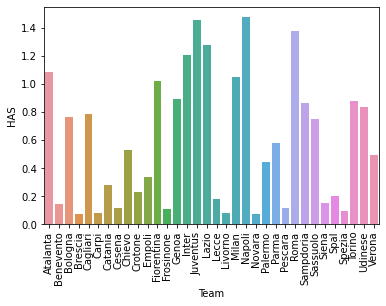

In [39]:
has_plot = sns.barplot(table_16.Team,table_16.HAS)
for item in has_plot.get_xticklabels():
    item.set_rotation(90)

C:\Users\Liezel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


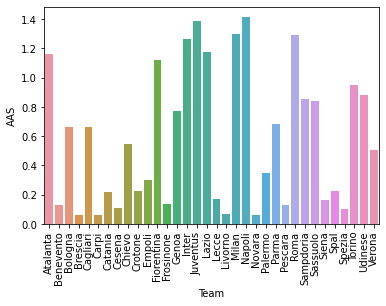

In [40]:
aas_plot = sns.barplot(table_16.Team,table_16.AAS)
for item in aas_plot.get_xticklabels():
    item.set_rotation(90)

C:\Users\Liezel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


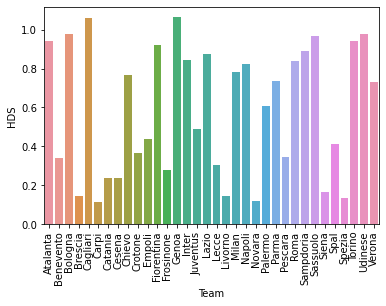

In [41]:
hds_plot = sns.barplot(table_16.Team,table_16.HDS)
for item in hds_plot.get_xticklabels():
    item.set_rotation(90)

C:\Users\Liezel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


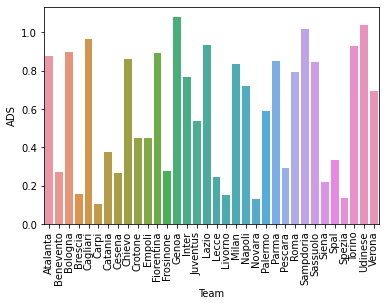

In [42]:
ads_plot = sns.barplot(table_16.Team,table_16.ADS)
for item in ads_plot.get_xticklabels():
    item.set_rotation(90)

In [214]:
table_16[table_16.Team == "Roma"]

,Team,HGS,AGS,HAS,AAS,HGC,AGC,HDS,ADS
25,Roma,400,300,1.376226,1.29394,194,231,0.836748,0.79477


In [215]:
''' feature_table contains all the fixtures in the current season.
ftr = full time result
hst = home shots on target
ast = away shots on target
'''

feature_table = feature_table[['HomeTeam','AwayTeam','FTR','HST','AST']]
f_HAS = []
f_HDS = []
f_AAS = []
f_ADS = []
for index,row in feature_table.iterrows():
    f_HAS.append(table_16[table_16['Team'] == row['HomeTeam']]['HAS'].values[0])
    f_HDS.append(table_16[table_16['Team'] == row['HomeTeam']]['HDS'].values[0])
    f_AAS.append(table_16[table_16['Team'] == row['AwayTeam']]['AAS'].values[0])
    f_ADS.append(table_16[table_16['Team'] == row['AwayTeam']]['ADS'].values[0])
    
feature_table['HAS'] = f_HAS
feature_table['HDS'] = f_HDS
feature_table['AAS'] = f_AAS
feature_table['ADS'] = f_ADS

In [216]:
feature_table.head(20)

,HomeTeam,AwayTeam,FTR,HST,AST,HAS,HDS,AAS,ADS
0,Fiorentina,Torino,H,8.0,3.0,1.021848,0.923011,0.953203,0.928952
1,Verona,Roma,D,7.0,7.0,0.495441,0.728920,1.293940,0.794770
2,Parma,Napoli,A,2.0,7.0,0.578015,0.737546,1.414708,0.722518
3,Genoa,Crotone,H,8.0,5.0,0.894547,1.065344,0.224283,0.450714
4,Sassuolo,Cagliari,D,10.0,4.0,0.746602,0.966142,0.659909,0.966799
5,Juventus,Sampdoria,H,9.0,2.0,1.455359,0.487384,0.854000,1.014966
6,Milan,Bologna,H,6.0,5.0,1.049372,0.780677,0.664223,0.897987
7,Torino,Atalanta,A,5.0,7.0,0.877344,0.940263,1.164546,0.877344
8,Cagliari,Lazio,A,3.0,7.0,0.784449,1.061031,1.177485,0.932393
9,Sampdoria,Benevento,A,4.0,6.0,0.863582,0.888505,0.129394,0.271805


In [217]:
def transformResult(row):
    '''Converts results (H,A or D) into numeric values'''
    if(row.FTR == 'H'):
        return 1
    elif(row.FTR == 'A'):
        return -1
    else:
        return 0

In [218]:
feature_table["Result"] = feature_table.apply(lambda row: transformResult(row),axis=1)

In [219]:
feature_table = feature_table[:-10] #ONLY FOR WEEK 33. REMOVE FROM 34
feature_table.tail(10)

,HomeTeam,AwayTeam,FTR,HST,AST,HAS,HDS,AAS,ADS,Result
3757,Chievo,Roma,D,2.0,4.0,0.526406,0.767738,1.293940,0.794770,0
3758,Napoli,Palermo,H,2.0,4.0,1.476002,0.823808,0.349364,0.591777,1
3759,Catania,Bologna,A,4.0,3.0,0.275245,0.237222,0.664223,0.897987,-1
3760,Cesena,Udinese,A,1.0,3.0,0.116979,0.237222,0.879879,1.039050,-1
3761,Fiorentina,Novara,D,5.0,2.0,1.021848,0.923011,0.064697,0.130741,0
3762,Genoa,Cagliari,H,3.0,3.0,0.894547,1.065344,0.659909,0.966799,1
3763,Juventus,Lecce,D,7.0,1.0,1.455359,0.487384,0.172525,0.244280,0
3764,Lazio,Siena,D,8.0,2.0,1.273009,0.875566,0.163899,0.220196,0
3765,Milan,Atalanta,H,9.0,2.0,1.049372,0.780677,1.164546,0.877344,1
3766,Parma,Inter,H,4.0,4.0,0.578015,0.737546,1.263748,0.767246,1


In [220]:
X_train = feature_table[['HST','AST','HAS','HDS','AAS','ADS',]]
y_train = feature_table['Result']

### Modeling

In [221]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingRegressor

In [222]:
clf1 = RandomForestClassifier()
clf2 = MultinomialNB()
clf3 = XGBClassifier()

In [223]:
y_pred = clf1.fit(X_train,y_train).predict(X_train)
accuracy_score(y_pred,y_train)
scores = cross_val_score(clf1, X_train, y_train, cv=10)
print(scores)
print(scores.mean())

[0.5596817  0.54907162 0.5198939  0.56498674 0.54907162 0.52519894
 0.53580902 0.54521277 0.52925532 0.49734043]
0.5375522038489757


In [224]:
y_pred = clf2.fit(X_train,y_train).predict(X_train)
accuracy_score(y_pred,y_train)
scores = cross_val_score(clf2, X_train, y_train, cv=10)
print(scores)
print(scores.mean())

[0.5596817  0.56763926 0.57824934 0.59416446 0.60742706 0.57824934
 0.58355438 0.6037234  0.53989362 0.57712766]
0.5789710198092444


In [225]:
y_pred = clf3.fit(X_train, y_train).predict(X_train)
accuracy_score(y_pred,y_train)
scores = cross_val_score(clf3, X_train, y_train, cv=10)
print(scores)
print(scores.mean())

C:\Users\Liezel\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:18:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Liezel\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:18:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:18:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:19:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:19:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

In [226]:

ht = res_16.loc[40].HomeTeam
at = res_16.loc[40].AwayTeam

In [239]:
feat_table = res_16[:-20].sort_index(ascending=False)
feat_table = feat_table[['HomeTeam','AwayTeam','FTR','FTHG','FTAG','HS','AS','HC','AC']]

### Adding new fixtures

In [240]:

new_fixtures = pd.DataFrame( [['Inter Milan','Milan','D',0,0,0,0,0,0],
                             ['Juventus','Atalanta','D',0,0,0,0,0,0],
                             ['Napoli','Lazio','D',0,0,0,0,0,0],
                             ['Roma','Sassuolo','D',0,0,0,0,0,0],
                             ['Sampdoria','Verona','D',0,0,0,0,0,0],
                             ['Bologna','Genoa','D',0,0,0,0,0,0],
                             ['Fiorentina','Udinese','D',0,0,0,0,0,0],
                             ['Spezia','Cagliari','D',0,0,0,0,0,0],
                             ['Torino','Benevento','D',0,0,0,0,0,0],
                             ['Crotone','Parma','D',0,0,0,0,0,0]],columns=feat_table.columns)

In [241]:
new_feat_table = new_fixtures.append(feat_table,ignore_index=True)
new_feat_table = new_feat_table.sort_index(ascending=False)
new_feat_table = new_feat_table.reset_index().drop(['index'], axis=1)
new_feat_table = new_feat_table.sort_index(ascending=False)
# feat_table = n
feat_table = new_feat_table
feat_table.shape

(3767, 9)

In [242]:
#Adding k recent performance measures
feat_table["pastHS"] = 0.0
feat_table["pastHC"] = 0.0
feat_table["pastAS"] = 0.0
feat_table["pastAC"] = 0.0
feat_table["pastHG"] = 0.0
feat_table["pastAG"] = 0.0

In [243]:
feat_table.head(12)

,HomeTeam,AwayTeam,FTR,FTHG,FTAG,HS,AS,HC,AC,pastHS,pastHC,pastAS,pastAC,pastHG,pastAG
3766,Inter Milan,Milan,D,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3765,Juventus,Atalanta,D,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3764,Napoli,Lazio,D,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3763,Roma,Sassuolo,D,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3762,Sampdoria,Verona,D,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3761,Bologna,Genoa,D,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3760,Fiorentina,Udinese,D,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3759,Spezia,Cagliari,D,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3758,Torino,Benevento,D,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3757,Crotone,Parma,D,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [244]:
k = 3
for i in range(feat_table.shape[0]-1,-1,-1):
    row = feat_table.loc[i]
    ht = row.HomeTeam
    at = row.AwayTeam
    ht_stats = feat_table.loc[i-1:-1][(feat_table.HomeTeam == ht) | (feat_table.AwayTeam == ht)].head(k)
    at_stats = feat_table.loc[i-1:-1][(feat_table.HomeTeam == at) | (feat_table.AwayTeam == at)].head(k)


    
def function(feat_table,i, self):
    
    feat_table.loc(self,i,'pastHC',(ht_stats[ht_stats['AwayTeam'] == ht].sum().HC + ht_stats[ht_stats['HomeTeam'] == ht].sum().HC)/k)
    feat_table.loc(self,i, 'pastAC', (at_stats[at_stats["AwayTeam"] == at].sum().HC + at_stats[at_stats["HomeTeam"] == at].sum().HC)/k)
    feat_table.loc(self,i, 'pastHS', (ht_stats[ht_stats["AwayTeam"] == ht].sum().HS + ht_stats[ht_stats["HomeTeam"] == ht].sum().AS)/k)
    feat_table.loc(self,i, 'pastAS', (at_stats[at_stats["AwayTeam"] == at].sum().HS + at_stats[at_stats["HomeTeam"] == at].sum().AS)/k)
    feat_table.loc(self,i, 'pastHG', (ht_stats[ht_stats["AwayTeam"] == ht].sum().FTAG + ht_stats[ht_stats["HomeTeam"] == ht].sum().FTHG)/k)
    feat_table.loc(self,i, 'pastAG', (at_stats[at_stats["AwayTeam"] == at].sum().FTAG + at_stats[at_stats["HomeTeam"] == at].sum().FTHG)/k)
    
f_HAS = []
f_HDS = []
f_AAS = []
f_ADS = []
for index,row in feature_table.iterrows():
    f_HAS.append(table_16[table_16['Team'] == row['HomeTeam']]['HAS'].values[0])
    f_HDS.append(table_16[table_16['Team'] == row['HomeTeam']]['HDS'].values[0])
    f_AAS.append(table_16[table_16['Team'] == row['AwayTeam']]['AAS'].values[0])
    f_ADS.append(table_16[table_16['Team'] == row['AwayTeam']]['ADS'].values[0])
    
    
feat_table['HAS'] = f_HAS
feat_table['HDS'] = f_HDS
feat_table['AAS'] = f_AAS
feat_table['ADS'] = f_ADS

<ipython-input-244-174971769a2d>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ht_stats = feat_table.loc[i-1:-1][(feat_table.HomeTeam == ht) | (feat_table.AwayTeam == ht)].head(k)
<ipython-input-244-174971769a2d>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  at_stats = feat_table.loc[i-1:-1][(feat_table.HomeTeam == at) | (feat_table.AwayTeam == at)].head(k)


In [245]:
test_table = feat_table.drop(['FTHG','FTAG','HS','AS','HC','AC'],axis=1)

In [246]:
test_table["Result"] = test_table.apply(lambda row: transformResult(row),axis=1)
test_table.sort_index(inplace=True)

In [247]:
# num_games decides the train-test split
print(feat_table.shape)
num_games = feat_table.shape[0]-10
num_games

(3767, 19)


3757

In [248]:
X_train = test_table[['pastHS','pastHC','pastAS','pastAC','pastHG','pastAG','HAS','HDS','AAS','ADS']].loc[0:num_games]
y_train = test_table['Result'].loc[0:num_games]
X_test = test_table[['pastHS','pastHC','pastAS','pastAC','pastHG','pastAG','HAS','HDS','AAS','ADS']].loc[num_games:]
y_test = test_table['Result'].loc[num_games:]

In [249]:
test_table["pastCornerDiff"] = (test_table["pastHC"] - test_table["pastAC"])/k
test_table["pastGoalDiff"] = (test_table["pastHG"] - test_table["pastAG"])/k
test_table["pastShotsDiff"] = (test_table["pastHS"] - test_table["pastAG"])/k

In [250]:
''' number of games to exclude in the training set for validation
For example, if 240 games have been played, test_table has 250 fixtures - the last 10 being the ones that haven't
been played. So, we set aside 20 fixtures from the training set containing 240 fixtures for validation.''' 
num_games = feat_table.shape[0]-10
print(num_games)
v_split = 15
n_games = num_games - v_split

3757


In [251]:
test_table = test_table.fillna(0)

In [252]:
test_table.tail()

,HomeTeam,AwayTeam,FTR,pastHS,pastHC,pastAS,pastAC,pastHG,pastAG,HAS,HDS,AAS,ADS,Result,pastCornerDiff,pastGoalDiff,pastShotsDiff
3762,Sampdoria,Verona,D,0.0,0.0,0.0,0.0,0.0,0.0,0.746602,0.966142,0.659909,0.966799,0,0.0,0.0,0.0
3763,Roma,Sassuolo,D,0.0,0.0,0.0,0.0,0.0,0.0,0.894547,1.065344,0.224283,0.450714,0,0.0,0.0,0.0
3764,Napoli,Lazio,D,0.0,0.0,0.0,0.0,0.0,0.0,0.578015,0.737546,1.414708,0.722518,0,0.0,0.0,0.0
3765,Juventus,Atalanta,D,0.0,0.0,0.0,0.0,0.0,0.0,0.495441,0.728920,1.293940,0.794770,0,0.0,0.0,0.0
3766,Inter Milan,Milan,D,0.0,0.0,0.0,0.0,0.0,0.0,1.021848,0.923011,0.953203,0.928952,0,0.0,0.0,0.0


In [253]:
test_table.drop(['pastHC','pastAS','pastAC','pastHG','pastAG'],axis=1)
X_train = test_table[['pastCornerDiff','pastGoalDiff','pastShotsDiff','HAS','HDS','AAS','ADS']].loc[0:n_games]
y_train = test_table['Result'].loc[0:n_games]
X_test = test_table[['pastCornerDiff','pastGoalDiff','pastShotsDiff','HAS','HDS','AAS','ADS']].loc[n_games:num_games-1]
y_test = test_table['Result'].loc[n_games:num_games-1]
X_predict = test_table[['pastCornerDiff','pastGoalDiff','pastShotsDiff','HAS','HDS','AAS','ADS']].loc[num_games:]

In [254]:
X_predict

,pastCornerDiff,pastGoalDiff,pastShotsDiff,HAS,HDS,AAS,ADS
3757,0.0,0.0,0.0,0.863582,0.888505,0.129394,0.271805
3758,0.0,0.0,0.0,0.784449,1.061031,1.177485,0.932393
3759,0.0,0.0,0.0,0.877344,0.940263,1.164546,0.877344
3760,0.0,0.0,0.0,1.049372,0.780677,0.664223,0.897987
3761,0.0,0.0,0.0,1.455359,0.487384,0.854000,1.014966
3762,0.0,0.0,0.0,0.746602,0.966142,0.659909,0.966799
3763,0.0,0.0,0.0,0.894547,1.065344,0.224283,0.450714
3764,0.0,0.0,0.0,0.578015,0.737546,1.414708,0.722518
3765,0.0,0.0,0.0,0.495441,0.728920,1.293940,0.794770
3766,0.0,0.0,0.0,1.021848,0.923011,0.953203,0.928952


In [255]:
plot_scores_knn = []
for b in range(1,50):
    clf_knn = KNeighborsClassifier(n_neighbors=b)
    clf_knn.fit(X_train,y_train)
    scores = accuracy_score(y_test,clf_knn.predict(X_test))
    plot_scores_knn.append(scores)
    
    
#XGBClassifier
plot_scores_XGB = []
for i in range(1,100):
    clf_XGB = XGBClassifier(n_estimators=i,max_depth=100)
    clf_XGB.fit(X_train, y_train)
    scores = accuracy_score(y_test,clf_XGB.predict(X_test))
    plot_scores_XGB.append(scores)


C:\Users\Liezel\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:24:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:24:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:24:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:24:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

Text(0.5, 1.0, 'XGB - Accuracy vs n_estimators')

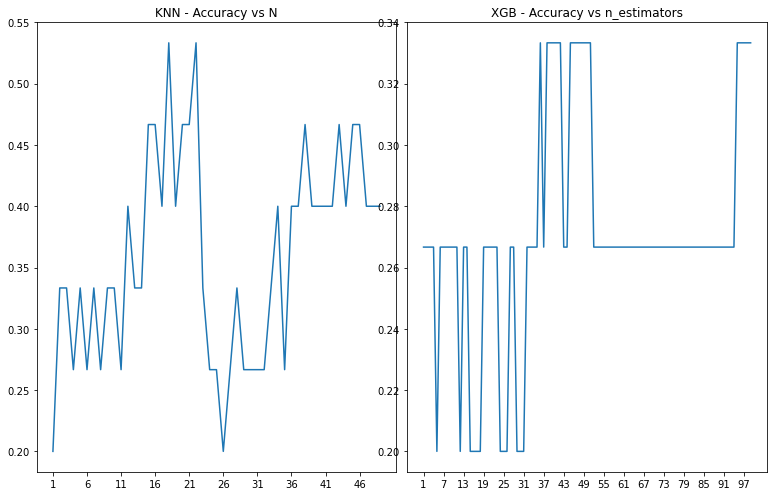

In [256]:
fig = plt.figure(figsize = (16,7))
# plt.style.use('ggplot')

ax1 = fig.add_subplot(1,3,1)
ax1.plot(range(1,50),plot_scores_knn);
ax1.set_title("KNN - Accuracy vs N")
ax1.set_xticks(range(1,50,5));
fig.tight_layout()

ax2 = fig.add_subplot(1,3,2)
ax2.plot(range(1,100),plot_scores_XGB);
ax2.set_xticks(range(1,100,6));
ax2.set_title("XGB - Accuracy vs n_estimators")

In [95]:
max_knn_n = max(plot_scores_knn)
max_knn_ind = plot_scores_knn.index(max_knn_n)


max_XGB_e = max(plot_scores_XGB)
max_XGB_ind = plot_scores_XGB.index(max_XGB_e) if plot_scores_XGB.index(max_XGB_e)!=0 else 1

print(max_knn_n, max_knn_ind)
#max_knn_ind=15 
print(max_XGB_e, max_XGB_ind)

0.5333333333333333 5
0.4666666666666667 1


In [97]:
clf_knn = KNeighborsClassifier(n_neighbors=max_knn_ind).fit(X_train,y_train)
clf_XGB = XGBClassifier(n_estimators=max_XGB_ind).fit(X_train,y_train)

[23:02:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Liezel\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [265]:
y_pred_knn = clf_knn.predict(X_predict)
y_pred_XGB = clf_XGB.predict(X_predict)

In [266]:
this_week = test_table[['HomeTeam','AwayTeam']].loc[num_games:]
this_week['Result_knn']=y_pred_knn
this_week['Result_XGB']=y_pred_XGB

In [267]:
this_week

,HomeTeam,AwayTeam,Result_knn,Result_XGB
3757,Crotone,Parma,1,1
3758,Torino,Benevento,1,1
3759,Spezia,Cagliari,1,1
3760,Fiorentina,Udinese,-1,-1
3761,Bologna,Genoa,1,1
3762,Sampdoria,Verona,1,1
3763,Roma,Sassuolo,1,0
3764,Napoli,Lazio,1,1
3765,Juventus,Atalanta,1,1
3766,Inter Milan,Milan,1,-1


In [268]:
def transformResultBack(row,col_name):
    if(row[col_name] == 1):
        return 'H'
    elif(row[col_name] == -1):
        return 'A'
    else:
        return 'D'

### Printing predicted results

In [269]:
this_week["Res_knn"] = this_week.apply(lambda row: transformResultBack(row,"Result_knn"),axis=1)
this_week["Res_XGB"] = this_week.apply(lambda row: transformResultBack(row,"Result_XGB"),axis=1)


this_week.drop(["Result_knn", "Result_XGB"],axis=1,inplace=True) 

In [270]:
print(max_knn_n, max_XGB_e)

this_week

0.5333333333333333 0.4666666666666667


,HomeTeam,AwayTeam,Res_knn,Res_XGB
3757,Crotone,Parma,H,H
3758,Torino,Benevento,H,H
3759,Spezia,Cagliari,H,H
3760,Fiorentina,Udinese,A,A
3761,Bologna,Genoa,H,H
3762,Sampdoria,Verona,H,H
3763,Roma,Sassuolo,H,D
3764,Napoli,Lazio,H,H
3765,Juventus,Atalanta,H,H
3766,Inter Milan,Milan,H,A


In [45]:
scaler = MinMaxScaler()
data = pd.get_dummies( data , columns=['FTR'])
data[["FTHG","FTAG","HTHG", "HTAG","HS","AS","HST","AST","HF","AF","HC","AC","HY","AY","HR","AR"]] = scaler.fit_transform(data[["FTHG","FTAG","HTHG", "HTAG","HS","AS","HST","AST","HF","AF","HC","AC","HY","AY","HR","AR"]])
data.head() 

,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,...,AF,HC,AC,HY,AY,HR,AR,FTR_A,FTR_D,FTR_H
0,Fiorentina,Torino,0.142857,0.000000,0.0,0.0,0.421053,0.200000,0.444444,0.1875,...,0.612903,0.190476,0.052632,0.428571,0.125,0.0,0.0,0,0,1
1,Verona,Roma,0.000000,0.000000,0.0,0.0,0.210526,0.500000,0.388889,0.4375,...,0.612903,0.000000,0.315789,0.285714,0.000,0.0,0.0,0,1,0
2,Parma,Napoli,0.000000,0.285714,0.0,0.0,0.078947,0.400000,0.111111,0.4375,...,0.354839,0.190476,0.105263,0.571429,0.125,0.0,0.0,1,0,0
3,Genoa,Crotone,0.571429,0.142857,0.6,0.2,0.236842,0.366667,0.444444,0.3125,...,0.419355,0.285714,0.210526,0.571429,0.250,0.0,0.0,0,0,1
4,Sassuolo,Cagliari,0.142857,0.142857,0.0,0.0,0.526316,0.266667,0.555556,0.2500,...,0.548387,0.333333,0.157895,0.142857,0.375,0.0,0.0,0,1,0


In [46]:
data.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,FTR_A,FTR_D,FTR_H
count,3787.000000,3787.000000,3787.000000,3787.000000,3787.000000,3787.000000,3787.000000,3787.000000,3787.000000,3787.000000,3787.000000,3787.000000,3787.000000,3787.000000,3787.000000,3787.000000,3787.000000,3787.000000,3787.000000
mean,0.219284,0.174922,0.135199,0.104674,0.330160,0.372502,0.288003,0.264045,0.430379,0.432575,0.274008,0.246355,0.312799,0.301888,0.056773,0.051492,0.302614,0.253235,0.444151
std,0.181661,0.164486,0.167561,0.147122,0.141821,0.152938,0.150880,0.152566,0.163822,0.141764,0.146370,0.142149,0.187556,0.169086,0.167951,0.131658,0.459450,0.434922,0.496937
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142857,0.000000,0.000000,0.000000,0.236842,0.266667,0.166667,0.125000,0.307692,0.322581,0.190476,0.157895,0.142857,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.142857,0.142857,0.000000,0.000000,0.315789,0.366667,0.277778,0.250000,0.423077,0.419355,0.238095,0.210526,0.285714,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.285714,0.285714,0.200000,0.200000,0.421053,0.466667,0.388889,0.375000,0.538462,0.516129,0.380952,0.315789,0.428571,0.375000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [47]:
x = data.drop( ['FTR_A','FTR_D','FTR_H','HomeTeam','AwayTeam'] , axis = 1).values      # features assignment
y1 = data[['FTR_H']].values                   # target assignment
x_train, x_test, y1_train, y1_test = train_test_split(x , y1 , test_size = 0.30, random_state = 0)  # training data

In [48]:
x

array([[0.14285714, 0.        , 0.        , ..., 0.125     , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.28571429, 0.        , ..., 0.125     , 0.        ,
        0.        ],
       ...,
       [0.28571429, 0.14285714, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.28571429, 0.14285714, 0.4       , ..., 0.5       , 0.        ,
        0.        ],
       [0.14285714, 0.        , 0.2       , ..., 0.25      , 0.        ,
        0.        ]])

In [51]:
y1

array([[1],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]], dtype=uint8)

In [52]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))
def mean_squared_error(predictions , labels):
    N = labels.size
    mse = ((predictions - labels)**2).sum()/(N*2)
    return mse
def accuracy(predictions , labels):
    predictions_correct = predictions.round() == labels
    accuracy = predictions_correct.mean()
    return accuracy

In [54]:
learning_rate = 0.01
epochs = 10000         # number of iterations      
N = y1_train.size

no_input = 16          # number of features
no_hidden= 8            
no_output = 1 

In [55]:
x_train.shape

(2650, 16)

In [56]:
np.random.seed(10)

weight_1 = np.random.normal(scale = 0.5 , size = (no_input ,no_hidden))
weight_2 = np.random.normal(scale = 0.5 , size = (no_hidden, no_output))

monitoring = {"mean_squared_error": [] , "accuracy": []} 

In [57]:
for epoch in range(epochs):
   
                                                                               #feedforward
    hidden_layer = sigmoid(np.dot(x_train, weight_1))
    output_layer = sigmoid(np.dot(hidden_layer, weight_2))
    
    mse = mean_squared_error(output_layer, y1_train)
    acc = accuracy(output_layer, y1_train)
    monitoring["mean_squared_error"].append(mse)
    monitoring["accuracy"].append(acc)
    
    output_delta = (output_layer - y1_train)*output_layer*(1- output_layer)
    hidden_delta = np.dot(output_delta , weight_2.T)*hidden_layer*(1 - hidden_layer)
   
    weight_2 -= learning_rate*np.dot(hidden_layer.T , output_delta) / N
    weight_1 -= learning_rate*np.dot(x_train.T , hidden_delta) / N
   
    monitoring_df = pd.DataFrame(monitoring)    

In [58]:
 monitoring_df

,mean_squared_error,accuracy
0,0.127021,0.481509
1,0.127019,0.481509
2,0.127017,0.481887
3,0.127015,0.481887
4,0.127013,0.481887
...,...,...
9995,0.120010,0.567925
9996,0.120009,0.567925
9997,0.120008,0.567925
9998,0.120008,0.567925


In [59]:
predictions = output_layer[:10]
predictions

array([[0.41944851],
       [0.4532124 ],
       [0.42486153],
       [0.45816378],
       [0.47364181],
       [0.44587567],
       [0.45310965],
       [0.44803463],
       [0.44127361],
       [0.4484134 ]])

In [60]:
labels = y1_train[:10]
labels

array([[0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1]], dtype=uint8)

In [61]:
predictions.round()

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [62]:
predictions.round() == labels

array([[ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False]])

In [63]:
predictions_correct = predictions.round() == labels
predictions_correct.mean()

0.5

<AxesSubplot:title={'center':'accuracy'}>

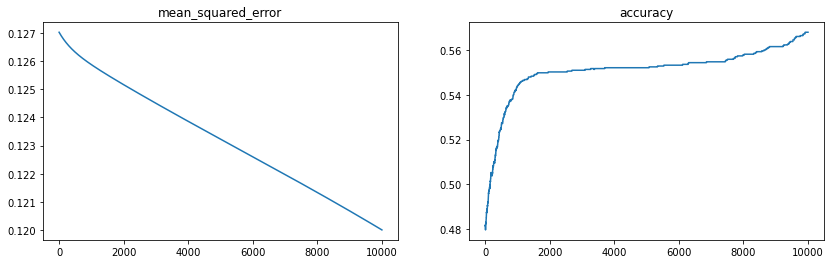

In [64]:
fig, axes = plt.subplots(1,2,figsize =(14,4))
monitoring_df.mean_squared_error.plot(ax=axes[0] , title = "mean_squared_error") 
monitoring_df.accuracy.plot(ax=axes[1] , title = "accuracy")  
# mean squared error and accuracy plots over iterations 

In [65]:
hidden_layer = sigmoid(np.dot(x_test, weight_1))        # network accuracy 
output_layer = sigmoid(np.dot(hidden_layer, weight_2))
accuracy(output_layer,y1_test)

0.5813544415127528

In [66]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scale = min_max_scaler.fit_transform(x)
x_scale

array([[0.14285714, 0.        , 0.        , ..., 0.125     , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.28571429, 0.        , ..., 0.125     , 0.        ,
        0.        ],
       ...,
       [0.28571429, 0.14285714, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.28571429, 0.14285714, 0.4       , ..., 0.5       , 0.        ,
        0.        ],
       [0.14285714, 0.        , 0.2       , ..., 0.25      , 0.        ,
        0.        ]])

In [67]:
x_train, x_value_and_test, y1_train, y1_value_and_test = train_test_split(x_scale, y1 , test_size = 0.2)
x_value, x_test, y1_value, y1_test = train_test_split(x_value_and_test, y1_value_and_test, test_size = 0.2) 

In [68]:
from keras.layers import Dense

In [69]:
model = Sequential([
    Dense(32, activation = 'relu' , input_shape = (16,)),
    Dense(32, activation = 'relu'),
    Dense(1, activation = 'sigmoid'),
])
model.compile(optimizer= 'sgd', loss='binary_crossentropy', metrics = ['accuracy'])
hist = model.fit(x_train , y1_train, batch_size = 30 , epochs = 40, validation_data= (x_value , y1_value))

Epoch 1/40
101/101 [==============================] - 59s 28ms/step - loss: 0.6869 - accuracy: 0.5678 - val_loss: 0.6516 - val_accuracy: 0.7079
Epoch 2/40
101/101 [==============================] - 0s 3ms/step - loss: 0.6539 - accuracy: 0.7052 - val_loss: 0.6226 - val_accuracy: 0.7294
Epoch 3/40
101/101 [==============================] - 0s 4ms/step - loss: 0.6247 - accuracy: 0.7349 - val_loss: 0.5984 - val_accuracy: 0.7871
Epoch 4/40
101/101 [==============================] - 0s 2ms/step - loss: 0.5997 - accuracy: 0.7718 - val_loss: 0.5717 - val_accuracy: 0.8317
Epoch 5/40
101/101 [==============================] - 0s 2ms/step - loss: 0.5719 - accuracy: 0.8073 - val_loss: 0.5430 - val_accuracy: 0.8812
Epoch 6/40
101/101 [==============================] - 0s 2ms/step - loss: 0.5405 - accuracy: 0.8565 - val_loss: 0.5075 - val_accuracy: 0.8713
Epoch 7/40
101/101 [==============================] - 0s 2ms/step - loss: 0.5104 - accuracy: 0.8522 - val_loss: 0.4718 - val_accuracy: 0.8993
Epoc

In [72]:
model.evaluate(x_test, y1_test)[1]

5/5 [==============================] - 0s 2ms/step - loss: 0.0526 - accuracy: 1.0000


1.0

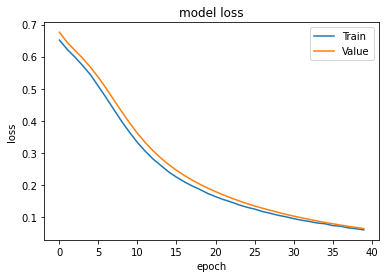

In [73]:
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train', 'Value'] , loc = 'upper right')
plt.show()         

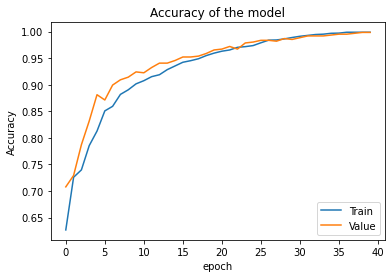

In [74]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy of the model')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Value'] , loc = 'lower right')
plt.show() 

In [75]:
y2 = data[['FTR_A']].values                   # target assignment
x_train, x_test, y2_train, y2_test = train_test_split(x , y2 , test_size = 0.30, random_state = 0)  # training data

In [76]:
y2

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]], dtype=uint8)

In [84]:
learning_rate = 0.01
epochs = 10000         # number of iterations      
N = y2_train.size

no_input = 16           # number of features
no_hidden= 8            
no_output = 1 

In [85]:
np.random.seed(10)

weight_1 = np.random.normal(scale = 0.5 , size = (no_input ,no_hidden))
weight_2 = np.random.normal(scale = 0.5 , size = (no_hidden, no_output))

monitoring = {"mean_squared_error": [] , "accuracy": []} 

In [86]:
for epoch in range(epochs):
   
                                                                               #feedforward
    hidden_layer = sigmoid(np.dot(x_train, weight_1))
    output_layer = sigmoid(np.dot(hidden_layer, weight_2))
    
    mse = mean_squared_error(output_layer, y2_train)
    acc = accuracy(output_layer, y2_train)
    monitoring["mean_squared_error"].append(mse)
    monitoring["accuracy"].append(acc)
    
    output_delta = (output_layer - y2_train)*output_layer*(1- output_layer)
    hidden_delta = np.dot(output_delta , weight_2.T)*hidden_layer*(1 - hidden_layer)
   
    weight_2 -= learning_rate*np.dot(hidden_layer.T , output_delta) / N
    weight_1 -= learning_rate*np.dot(x_train.T , hidden_delta) / N
   
    monitoring_df = pd.DataFrame(monitoring)

In [87]:
monitoring_df

,mean_squared_error,accuracy
0,0.118134,0.710943
1,0.118090,0.710943
2,0.118047,0.713208
3,0.118004,0.712075
4,0.117960,0.712830
...,...,...
9995,0.097837,0.699623
9996,0.097837,0.699623
9997,0.097836,0.699623
9998,0.097835,0.699623


<AxesSubplot:title={'center':'accuracy'}>

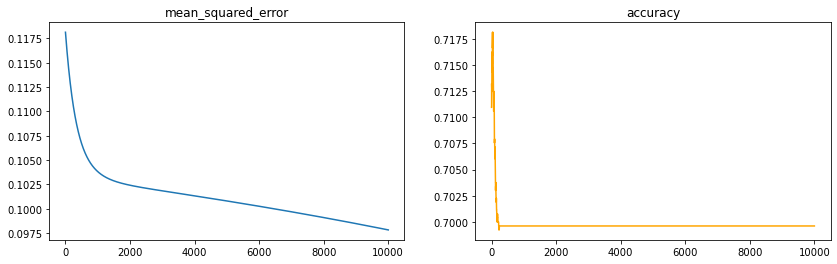

In [88]:
fig, axes = plt.subplots(1,2,figsize =(14,4))
monitoring_df.mean_squared_error.plot(ax=axes[0] , title = "mean_squared_error") 
monitoring_df.accuracy.plot(ax=axes[1] , title = "accuracy", color='orange')  
# mean squared error and accuracy plots over iterations       

In [89]:
hidden_layer = sigmoid(np.dot(x_test, weight_1))        # network accuracy 
output_layer = sigmoid(np.dot(hidden_layer, weight_2))
accuracy(output_layer,y2_test)

0.6921723834652594

In [90]:
x_train, x_value_and_test, y2_train, y2_value_and_test = train_test_split(x_scale, y2 , test_size = 0.2)
x_value, x_test, y2_value, y2_test = train_test_split(x_value_and_test, y2_value_and_test, test_size = 0.2) 

In [91]:
from keras.layers import Dense

In [92]:
model = Sequential([
    Dense(32, activation = 'relu' , input_shape = (16,)),
    Dense(32, activation = 'relu'),
    Dense(1, activation = 'sigmoid'),
])
model.compile(optimizer= 'sgd', loss='binary_crossentropy', metrics = ['accuracy'])
hist = model.fit(x_train , y2_train, batch_size = 30 , epochs = 40, validation_data= (x_value , y2_value))

Epoch 1/40
101/101 [==============================] - 2s 7ms/step - loss: 0.6432 - accuracy: 0.7025 - val_loss: 0.6029 - val_accuracy: 0.6766
Epoch 2/40
101/101 [==============================] - 0s 2ms/step - loss: 0.5807 - accuracy: 0.6944 - val_loss: 0.5850 - val_accuracy: 0.6766
Epoch 3/40
101/101 [==============================] - 0s 3ms/step - loss: 0.5564 - accuracy: 0.6988 - val_loss: 0.5670 - val_accuracy: 0.6766
Epoch 4/40
101/101 [==============================] - 0s 2ms/step - loss: 0.5388 - accuracy: 0.6983 - val_loss: 0.5461 - val_accuracy: 0.6848
Epoch 5/40
101/101 [==============================] - 0s 3ms/step - loss: 0.5175 - accuracy: 0.7068 - val_loss: 0.5207 - val_accuracy: 0.7013
Epoch 6/40
101/101 [==============================] - 0s 3ms/step - loss: 0.4776 - accuracy: 0.7387 - val_loss: 0.4950 - val_accuracy: 0.7228
Epoch 7/40
101/101 [==============================] - 0s 2ms/step - loss: 0.4582 - accuracy: 0.7601 - val_loss: 0.4666 - val_accuracy: 0.7673
Epoch 

In [93]:
model.evaluate(x_test, y2_test)[1]

5/5 [==============================] - 0s 2ms/step - loss: 0.0940 - accuracy: 1.0000


1.0

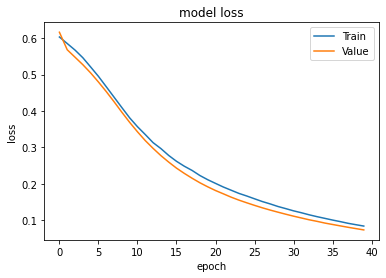

In [94]:
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train', 'Value'] , loc = 'upper right')
plt.show() 

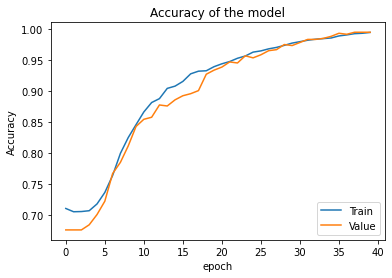

In [95]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy of the model')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Value'] , loc = 'lower right')
plt.show() 

In [96]:
y3 = data[['FTR_D']].values                   # target assignment
x_train, x_test, y3_train, y3_test = train_test_split(x , y3 , test_size = 0.30, random_state = 0)  # training data

In [311]:
y3

array([[0],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=uint8)

In [97]:
learning_rate = 0.01
epochs = 10000        # number of iterations      
N = y3_train.size

no_input = 16           # number of features
no_hidden= 8            
no_output = 1 

In [98]:
np.random.seed(10)

weight_1 = np.random.normal(scale = 0.5 , size = (no_input ,no_hidden))
weight_2 = np.random.normal(scale = 0.5 , size = (no_hidden, no_output))

monitoring = {"mean_squared_error": [] , "accuracy": []} 

In [99]:
for epoch in range(epochs):
   
                                                                               #feedforward
    hidden_layer = sigmoid(np.dot(x_train, weight_1))
    output_layer = sigmoid(np.dot(hidden_layer, weight_2))
    
    mse = mean_squared_error(output_layer, y3_train)
    acc = accuracy(output_layer, y3_train)
    monitoring["mean_squared_error"].append(mse)
    monitoring["accuracy"].append(acc)
    
    output_delta = (output_layer - y3_train)*output_layer*(1- output_layer)
    hidden_delta = np.dot(output_delta , weight_2.T)*hidden_layer*(1 - hidden_layer)
   
    weight_2 -= learning_rate*np.dot(hidden_layer.T , output_delta) / N
    weight_1 -= learning_rate*np.dot(x_train.T , hidden_delta) / N
   
    monitoring_df = pd.DataFrame(monitoring)  

In [100]:
 monitoring_df

,mean_squared_error,accuracy
0,0.120020,0.674717
1,0.119946,0.675849
2,0.119871,0.679623
3,0.119797,0.681887
4,0.119723,0.681509
...,...,...
9995,0.093559,0.748679
9996,0.093559,0.748679
9997,0.093559,0.748679
9998,0.093559,0.748679


<AxesSubplot:title={'center':'accuracy'}>

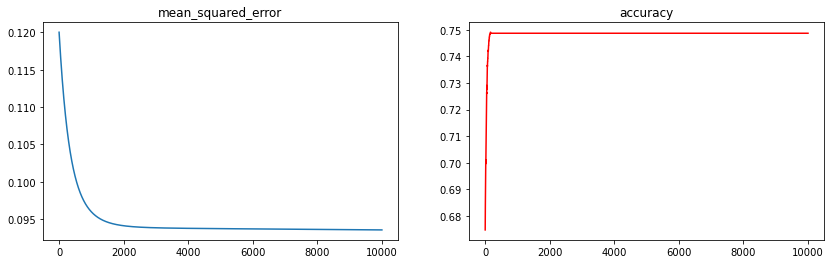

In [101]:
fig, axes = plt.subplots(1,2,figsize =(14,4))
monitoring_df.mean_squared_error.plot(ax=axes[0] , title = "mean_squared_error") 
monitoring_df.accuracy.plot(ax=axes[1] , title = "accuracy", color='red')  
# mean squared error and accuracy plots over iterations  

In [102]:
hidden_layer = sigmoid(np.dot(x_test, weight_1))        # network accuracy 
output_layer = sigmoid(np.dot(hidden_layer, weight_2))
accuracy(output_layer,y3_test)

0.7423043095866315

In [103]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scale = min_max_scaler.fit_transform(x)
x_scale

array([[0.14285714, 0.        , 0.        , ..., 0.125     , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.28571429, 0.        , ..., 0.125     , 0.        ,
        0.        ],
       ...,
       [0.28571429, 0.14285714, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.28571429, 0.14285714, 0.4       , ..., 0.5       , 0.        ,
        0.        ],
       [0.14285714, 0.        , 0.2       , ..., 0.25      , 0.        ,
        0.        ]])

In [104]:
x_train, x_value_and_test, y3_train, y3_value_and_test = train_test_split(x_scale, y3 , test_size = 0.2)
x_value, x_test, y3_value, y3_test = train_test_split(x_value_and_test, y3_value_and_test, test_size = 0.2) 

In [105]:
from keras.layers import Dense 

In [106]:
model = Sequential([
    Dense(32, activation = 'relu' , input_shape = (16,)),
    Dense(32, activation = 'relu'),
    Dense(1, activation = 'sigmoid'),
])
model.compile(optimizer= 'sgd', loss='binary_crossentropy', metrics = ['accuracy'])
hist = model.fit(x_train , y3_train, batch_size = 20 , epochs = 40, validation_data= (x_value , y3_value))

Epoch 1/40
152/152 [==============================] - 2s 5ms/step - loss: 0.6654 - accuracy: 0.6160 - val_loss: 0.5811 - val_accuracy: 0.7442
Epoch 2/40
152/152 [==============================] - 0s 2ms/step - loss: 0.5844 - accuracy: 0.7301 - val_loss: 0.5632 - val_accuracy: 0.7442
Epoch 3/40
152/152 [==============================] - 0s 2ms/step - loss: 0.5662 - accuracy: 0.7409 - val_loss: 0.5612 - val_accuracy: 0.7442
Epoch 4/40
152/152 [==============================] - 0s 2ms/step - loss: 0.5536 - accuracy: 0.7508 - val_loss: 0.5601 - val_accuracy: 0.7442
Epoch 5/40
152/152 [==============================] - 0s 2ms/step - loss: 0.5633 - accuracy: 0.7417 - val_loss: 0.5590 - val_accuracy: 0.7442
Epoch 6/40
152/152 [==============================] - 0s 2ms/step - loss: 0.5710 - accuracy: 0.7333 - val_loss: 0.5581 - val_accuracy: 0.7442
Epoch 7/40
152/152 [==============================] - 0s 2ms/step - loss: 0.5476 - accuracy: 0.7537 - val_loss: 0.5569 - val_accuracy: 0.7442
Epoch 

In [107]:
model.evaluate(x_test, y3_test)[1]

5/5 [==============================] - 0s 2ms/step - loss: 0.5154 - accuracy: 0.7566


0.7565789222717285

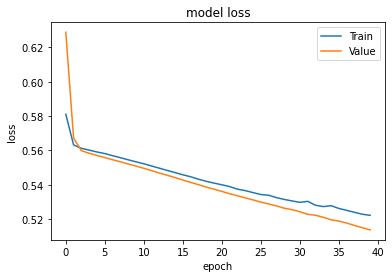

In [108]:
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train', 'Value'] , loc = 'upper right')
plt.show()    

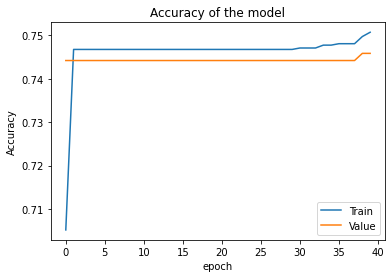

In [109]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy of the model')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Value'] , loc = 'lower right')
plt.show() 